In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0-rc2


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
xtrain.shape


(60000, 28, 28)

T-shirt/Top


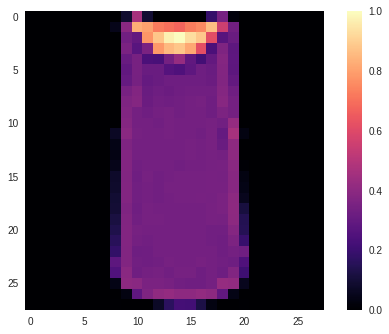

In [23]:
x=2
plt.figure()
plt.imshow(xtrain[x],cmap='magma')
plt.colorbar()
plt.grid(False)
print(class_names[ytrain[x]])

In [0]:
xtrain,xtest=xtrain/255.0,xtest/255.0


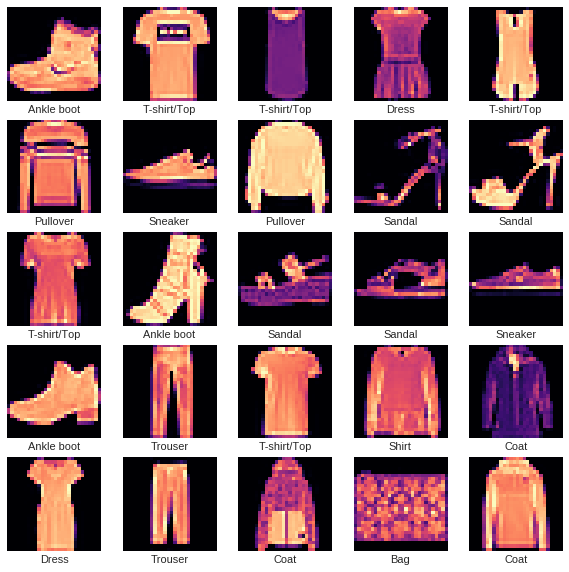

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i],cmap="magma")
  plt.xlabel(class_names[ytrain[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1024,activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation=tf.nn.softmax)
    
    
    
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(xtrain,ytrain,epochs=100)

In [11]:
testloss,testacc = model.evaluate(xtest,ytest)
print("Test Accuracy:", testacc)

10000/10000 [==============================] - 1s 76us/step
Test Accuracy: 0.8908


In [24]:
predictions = model.predict(xtest)
print(class_names[np.argmax(predictions[2])])

Trouser


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

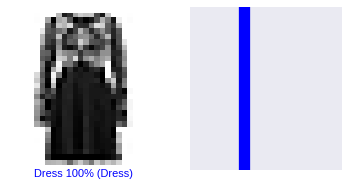

In [31]:
i = 1001
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  ytest)

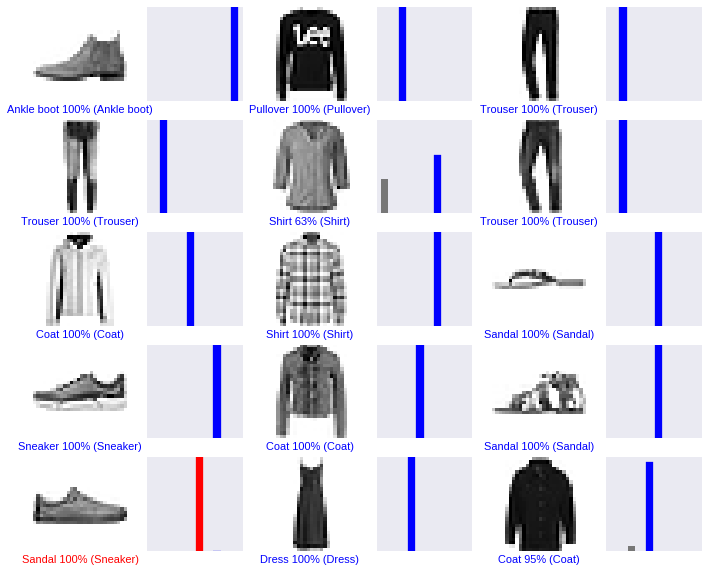

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, ytest)

In [0]:
trueimg=xtest[0]
img=(np.expand_dims(trueimg,0))

In [0]:
predictions_single=model.predict(img)

In [37]:
print(predictions)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.6486812e-21
  3.9385633e-36 1.0000000e+00]
 [9.3236254e-15 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [9.8976928e-29 0.0000000e+00 1.3096599e-23 ... 3.0388832e-19
  3.0960824e-24 1.4235641e-32]]


9

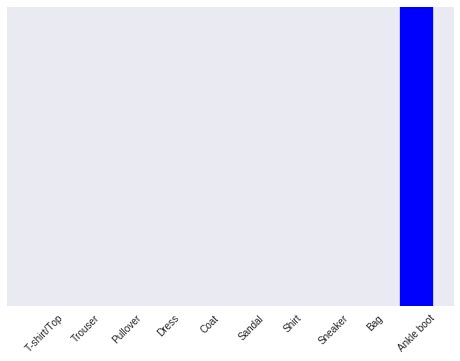

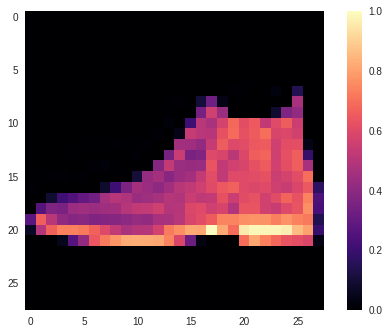

In [44]:
plot_value_array(0, predictions_single, ytest)
_ = plt.xticks(range(10), class_names, rotation=45)

plt.figure()
plt.imshow(trueimg, cmap='magma')
plt.colorbar()
plt.grid(False)


np.argmax(predictions_single[0])